<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [5]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [6]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [9]:
print (boston_df.head(10))

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0   
5           5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0   
6           6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0   
7           7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0   
8           8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0   
9           9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7 

In [10]:
print("\nSummary statistics of the dataset:")
print(boston_df.describe())


Summary statistics of the dataset:
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.4

In [11]:
# Check for missing values
print("\nMissing values in the dataset:")
print(boston_df.isnull().sum())


Missing values in the dataset:
Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64


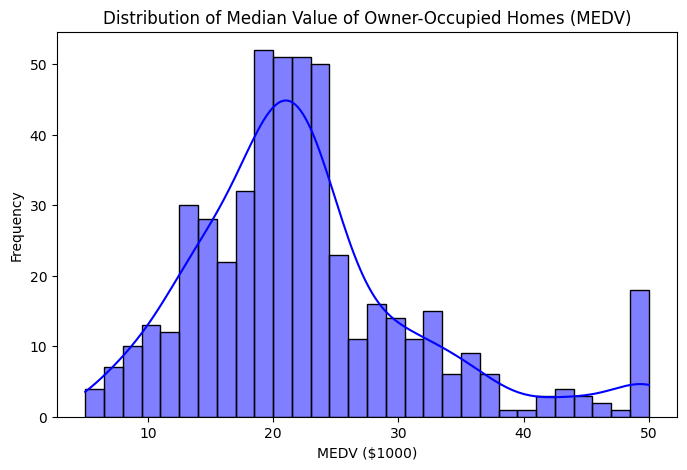

In [13]:
# Visualize the distribution of 'MEDV' (Median value of owner-occupied homes)
pyplot.figure(figsize=(8, 5))
sns.histplot(boston_df['MEDV'], kde=True, bins=30, color='blue')
pyplot.title('Distribution of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.xlabel('MEDV ($1000)')
pyplot.ylabel('Frequency')
pyplot.show()

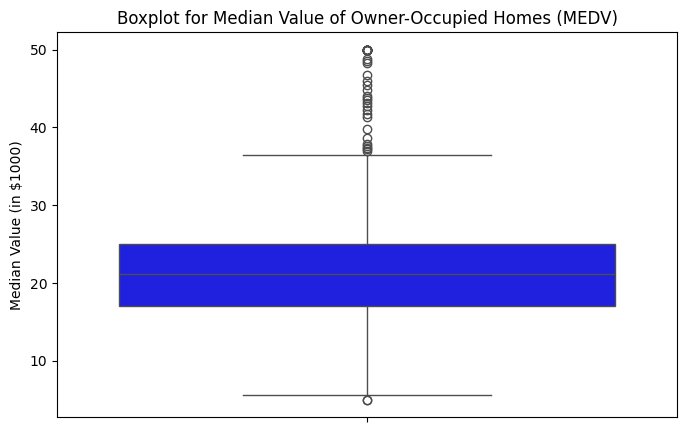

In [14]:
# 1. Boxplot for Median Value of Owner-Occupied Homes (MEDV)
pyplot.figure(figsize=(8, 5))
sns.boxplot(y=boston_df['MEDV'], color='blue')
pyplot.title('Boxplot for Median Value of Owner-Occupied Homes (MEDV)')
pyplot.ylabel('Median Value (in $1000)')
pyplot.show()

<ipython-input-15-c3882c8c1073>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chas_counts.index, y=chas_counts.values, palette='viridis')


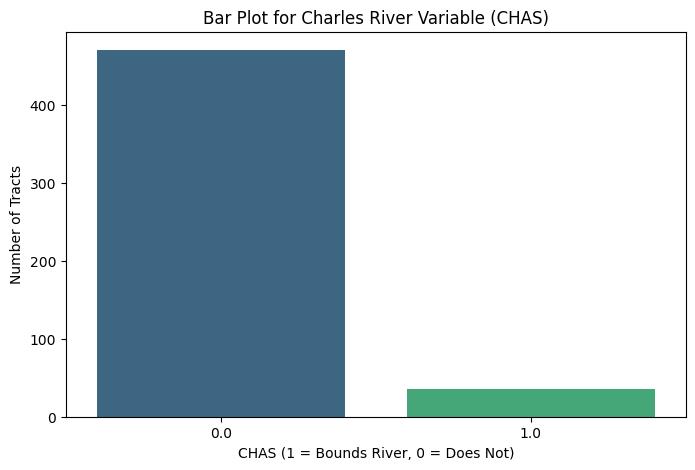

In [15]:
# 2. Bar Plot for Charles River Variable (CHAS)
pyplot.figure(figsize=(8, 5))
chas_counts = boston_df['CHAS'].value_counts()
sns.barplot(x=chas_counts.index, y=chas_counts.values, palette='viridis')
pyplot.title('Bar Plot for Charles River Variable (CHAS)')
pyplot.xlabel('CHAS (1 = Bounds River, 0 = Does Not)')
pyplot.ylabel('Number of Tracts')
pyplot.show()

<ipython-input-16-e24a0b05a435>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df, palette='coolwarm')


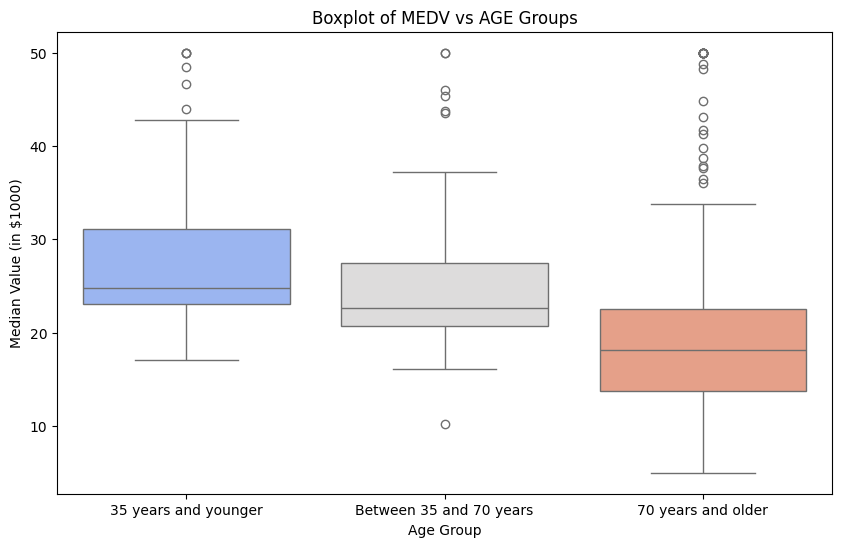

In [16]:
# 3. Boxplot for MEDV vs Discretized AGE
# Discretize the AGE variable
boston_df['AGE_Group'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, 100],
    labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older']
)

pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df, palette='coolwarm')
pyplot.title('Boxplot of MEDV vs AGE Groups')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value (in $1000)')
pyplot.show()


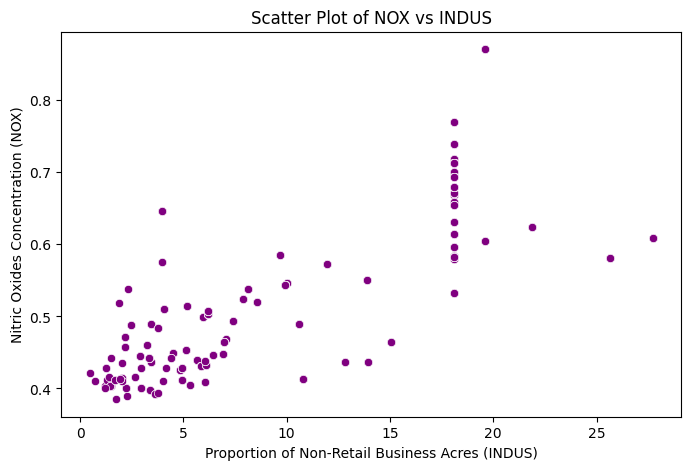

In [17]:
# 4. Scatter Plot for NOX vs INDUS
pyplot.figure(figsize=(8, 5))
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'], color='purple')
pyplot.title('Scatter Plot of NOX vs INDUS')
pyplot.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.ylabel('Nitric Oxides Concentration (NOX)')
pyplot.show()

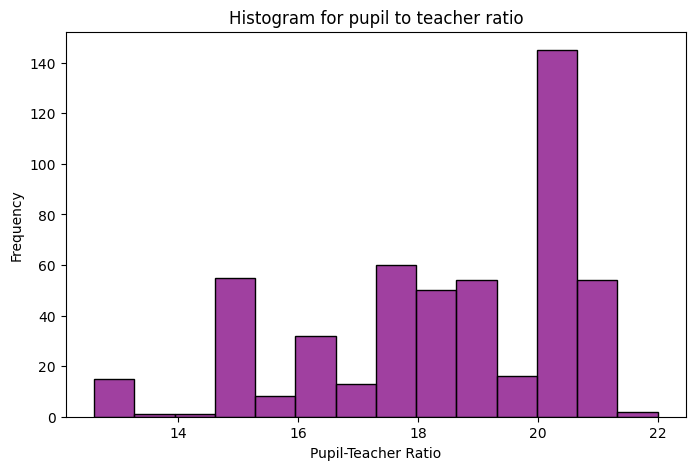

In [22]:
# 4. Histogram for pupil to teacher ratio
pyplot.figure(figsize=(8, 5))
sns.histplot(boston_df['PTRATIO'], color='purple')
pyplot.title('Histogram for pupil to teacher ratio')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

In [24]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
from scipy.stats import ttest_ind

# Split the data into two groups: CHAS = 1 and CHAS = 0
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform a t-test
t_stat, p_value = ttest_ind(chas_1, chas_0)

# Print results
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median value of houses.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median value of houses.")


T-statistic: 3.996, P-value: 0.000
Reject the null hypothesis: There is a significant difference in median value of houses.


In [25]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
from scipy.stats import f_oneway

# Group the data into AGE groups
age_groups = [
    boston_df[boston_df['AGE_Group'] == '35 years and younger']['MEDV'],
    boston_df[boston_df['AGE_Group'] == 'Between 35 and 70 years']['MEDV'],
    boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV']
]

# Perform ANOVA
f_stat, p_value = f_oneway(*age_groups)

# Print results
print(f"F-statistic: {f_stat:.3f}, P-value: {p_value:.3f}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values of houses among AGE groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values of houses among AGE groups.")

F-statistic: 36.408, P-value: 0.000
Reject the null hypothesis: There is a significant difference in median values of houses among AGE groups.


In [26]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
from scipy.stats import pearsonr

# Perform Pearson correlation
corr_coef, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print results
print(f"Pearson Correlation Coefficient: {corr_coef:.3f}, P-value: {p_value:.3f}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between NOX and INDUS.")

Pearson Correlation Coefficient: 0.764, P-value: 0.000
Reject the null hypothesis: There is a significant relationship between NOX and INDUS.
